In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [584]:
def fftnoise(f):
    # borrowed from https://stackoverflow.com/users/2812618/frank-zalkow
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.exp(1j * phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

In [585]:
def lorentzian(f, s0, f0, y):
    return (s0 * y)**2 / ((f - f0)**2 + y**2)

def one_on_f(f, s0, f0):
    fout = np.abs(np.copy(f))
    idx1 = np.where(fout < f0)
    idx2 = np.where(fout >= f0)
    fout[idx1] = s0**2
    fout[idx2] = s0**2 * f0 / fout[idx2]
    return fout

def prune(array, min_value, max_value):
    idxlow = np.where(array < min_value)[0]
    idxhigh = np.where(array > max_value)[0]
    array[idxhigh] = max_value
    array[idxlow] = min_value
    return array

In [586]:
def generate_lorentzian_noise(s0, f0, y, min_value=-1e10, max_value=1e10, samples=1024, samplerate=1/1e-3):
    freqs = np.fft.fftfreq(samples, 1/samplerate)
    f = lorentzian(freqs, s0, f0, y)
    return freqs, f, prune(fftnoise(f), min_value, max_value)

def generate_one_on_f_noise(s0, f0, min_value=-1e10, max_value=1e10, samples=1024, samplerate=1/1e-3):
    freqs = np.fft.fftfreq(samples, 1/samplerate)
    f = one_on_f(freqs, s0, f0)
    return freqs, f, prune(fftnoise(f), min_value, max_value)

def generate_white_noise(s0, min_value=-1e10, max_value=1e10, min_freq=-1e-10, max_freq=1e10, samples=1024, samplerate=1/1e-3):
    freqs = np.fft.fftfreq(samples, 1/samplerate)
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = s0**2
    return freqs, f, prune(fftnoise(f), min_value, max_value)

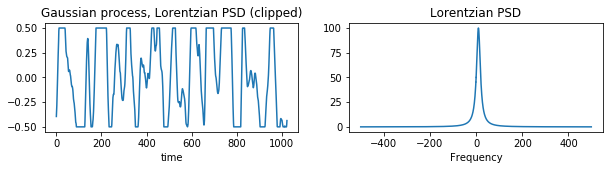

In [587]:
freqs, f, b = generate_lorentzian_noise(10, 10, 10, max_value=0.5, min_value=-0.5)

fig, ax = plt.subplots(1,2, figsize=(10,2))
ax[0].plot(range(len(b)), b)
ax[0].set_title("Gaussian process, Lorentzian PSD (clipped)")
ax[0].set_xlabel("time")
ax[1].plot(freqs[0:len(freqs)//2], f[0:len(freqs)//2], color="C0")
ax[1].plot(freqs[len(freqs)//2:], f[len(freqs)//2:], color="C0")
ax[1].plot([freqs[0], freqs[-1]], [f[0], f[-1]])
ax[1].set_xlabel("Frequency")
ax[1].set_title("Lorentzian PSD")
plt.show()

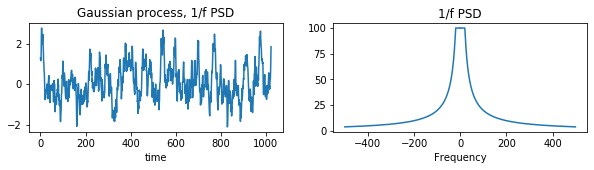

In [588]:
freqs, f, b = generate_one_on_f_noise(10, 20)

fig, ax = plt.subplots(1,2, figsize=(10,2))
ax[0].plot(range(len(b)), b)
ax[0].set_title("Gaussian process, 1/f PSD")
ax[0].set_xlabel("time")
ax[1].plot(freqs[0:len(freqs)//2], f[0:len(freqs)//2], color="C0")
ax[1].plot(freqs[len(freqs)//2:], f[len(freqs)//2:], color="C0")
ax[1].plot([freqs[0], freqs[-1]], [f[0], f[-1]])
ax[1].set_xlabel("Frequency")
ax[1].set_title("1/f PSD")
plt.show()

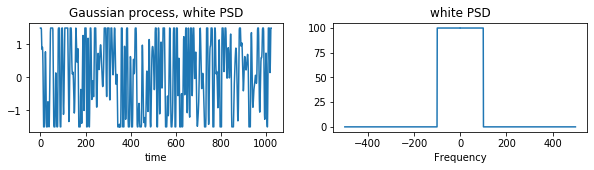

In [589]:
freqs, f, b = generate_white_noise(10, min_freq=-100, max_freq=100, min_value=-1.5, max_value=1.5)

fig, ax = plt.subplots(1,2, figsize=(10,2))
ax[0].plot(range(len(b)), b)
ax[0].set_title("Gaussian process, white PSD")
ax[0].set_xlabel("time")
ax[1].plot(freqs[0:len(freqs)//2], f[0:len(freqs)//2], color="C0")
ax[1].plot(freqs[len(freqs)//2:], f[len(freqs)//2:], color="C0")
ax[1].plot([freqs[0], freqs[-1]], [f[0], f[-1]])
ax[1].set_xlabel("Frequency")
ax[1].set_title("white PSD")
plt.show()